# **PROJETO ANÁLISE DOS DADOS DO COVID 19 NO ESTADO DE SÃO PAULO**

Este projeto analisa os dados dos casos de COVID-19 no estado de São Paulo do período de fevereiro de 2020 a setembro de 2021.

# **Importação dos Dados**

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

path = './dados/covid_sp_tratado.csv'
covid = pd.read_csv(path, sep=';', encoding='utf-8')

In [3]:
covid.head()

,indice,municipio,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade
0,1,Adamantina,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,33894,7398,411.99,9,82.268987
1,2,Adolfo,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,3447,761,211.06,9,16.331849
2,3,Aguaí,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,35608,5245,474.55,9,75.035297
3,4,Águas da Prata,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,7797,1729,142.67,9,54.650592
4,5,Águas de Lindóia,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,18374,3275,60.13,9,305.571262


In [4]:
covid.shape

(373455, 19)

In [5]:
# Análise dos atributos

covid.dtypes

indice             int64
municipio         object
dia                int64
mes                int64
data              object
casos              int64
casos_novos        int64
casos_pc         float64
casos_mm7d       float64
obitos             int64
obitos_novos       int64
obitos_pc        float64
obitos_mm7d      float64
letalidade       float64
pop                int64
pop_60             int64
area             float64
semana_epidem      int64
densidade        float64
dtype: object

# **Filtrando duas cidades: São José do Rio Preto e Guarulhos**

In [6]:
covid_sjrp = covid.loc[covid.municipio == 'São José do Rio Preto']
covid_guarulhos = covid.loc[covid.municipio == 'Guarulhos']

In [7]:
# Criação de uma coluna com a porcentagem de idosos

covid_sjrp['porcentagem_idosos'] = 100 * covid_sjrp['pop_60'] / covid_sjrp['pop']
covid_guarulhos['porcentagem_idosos'] = 100 * covid_guarulhos['pop_60'] / covid_guarulhos['pop']

In [8]:
covid_sjrp.head(3)

,indice,municipio,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
556,557,São José do Rio Preto,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,447924,79391,431.94,9,1037.00514,17.724212
1201,1202,São José do Rio Preto,26,2,2020-02-26,0,0,0.0,0.0,0,0,0.0,0.0,0.0,447924,79391,431.94,9,1037.00514,17.724212
1846,1847,São José do Rio Preto,27,2,2020-02-27,0,0,0.0,0.0,0,0,0.0,0.0,0.0,447924,79391,431.94,9,1037.00514,17.724212


In [9]:
covid_guarulhos.head(3)

,indice,municipio,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
212,213,Guarulhos,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304,12.037668
857,858,Guarulhos,26,2,2020-02-26,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304,12.037668
1502,1503,Guarulhos,27,2,2020-02-27,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304,12.037668


In [10]:
covid_sjrp.shape

(579, 20)

In [11]:
covid_guarulhos.shape

(579, 20)

# **Medidas de Centralidade**

## **Média**

### **São José do Rio Preto**

In [12]:
# Calcula a MÉDIA dos valores da coluna desejada:
# nome_tabela['nome_coluna'].mean()

covid_sjrp['obitos_novos'].mean()

4.8117443868739205

In [13]:
# Outra maneira:
# nome_tabela.nome_coluna.mean()

covid_sjrp.casos_novos.mean()

164.03454231433506

### **Guarulhos**

In [14]:
# Ver apenas a quantidade de casas decimais desejadas:
# round(..., num_casas_decimais)

round(covid_guarulhos['obitos_novos'].mean(), 3)

8.404

In [15]:
round(covid_guarulhos.casos_novos.mean(), 3)

109.496

## **Mediana**

### **São José do Rio Preto**

In [16]:
# Calcula a MEDIANA dos valores da coluna desejada:
# nome_tabela['nome_coluna'].median()

covid_sjrp['obitos_novos'].median()

4.0

In [17]:
covid_sjrp['casos_novos'].median()

133.0

### **Guarulhos**

In [18]:
covid_guarulhos['obitos_novos'].median()

4.0

In [19]:
covid_guarulhos['casos_novos'].median()

87.0

## **Moda**

In [20]:
# Calcula a MODA dos valores da coluna desejada:
# nome_tabela['nome_coluna'].mode()

covid_sjrp['obitos_novos'].mode()

0    0
Name: obitos_novos, dtype: int64

In [21]:
covid_sjrp['dia'].mode()  # Dia 25 aparecerá mais pois é onde começa a análise no mês de fevereiro

0    25
Name: dia, dtype: int64

In [22]:
covid_guarulhos['dia'].mode()

0    25
Name: dia, dtype: int64

In [23]:
covid_guarulhos.mes.mode()  # Meses com mais dias vão aparecer mais

0    3
1    5
2    7
3    8
Name: mes, dtype: int64

# **Descrição Geral**

In [24]:
# Aprensenta uma visão geral de todas as colunas:
# nome_tabela.describe()

covid_sjrp.describe()

,indice,dia,mes,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.0,579.0,579.00,579.000000,579.00000,5.790000e+02
mean,186962.000000,15.737478,6.269430,38511.975820,164.034542,8597.881743,163.790279,1073.687392,4.811744,239.703028,4.800395,0.028114,447924.0,79391.0,431.94,25.792746,1037.00514,1.772421e+01
std,107900.229958,8.803909,3.024688,32311.125124,155.344150,7213.528439,111.510643,950.678612,4.906475,212.241053,4.169069,0.014622,0.0,0.0,0.00,13.389761,0.00000,3.555786e-15
min,557.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,447924.0,79391.0,431.94,1.000000,1037.00514,1.772421e+01
25%,93759.500000,8.000000,4.000000,5632.500000,34.000000,1257.467785,72.285714,166.500000,1.000000,37.171484,1.857143,0.025013,447924.0,79391.0,431.94,15.000000,1037.00514,1.772421e+01
50%,186962.000000,16.000000,6.000000,32475.000000,133.000000,7250.113859,173.428571,837.000000,4.000000,186.862057,3.857143,0.027486,447924.0,79391.0,431.94,25.000000,1037.00514,1.772421e+01
75%,280164.500000,23.000000,9.000000,65875.000000,243.500000,14706.735964,233.500000,1940.000000,7.000000,433.109188,6.714286,0.029538,447924.0,79391.0,431.94,36.000000,1037.00514,1.772421e+01
max,373367.000000,31.000000,12.000000,94976.000000,1040.000000,21203.597039,519.714286,2786.000000,31.000000,621.980515,20.428571,0.112676,447924.0,79391.0,431.94,53.000000,1037.00514,1.772421e+01


In [25]:
round(covid_sjrp.describe(), 1)

,indice,dia,mes,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
count,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0
mean,186962.0,15.7,6.3,38512.0,164.0,8597.9,163.8,1073.7,4.8,239.7,4.8,0.0,447924.0,79391.0,431.9,25.8,1037.0,17.7
std,107900.2,8.8,3.0,32311.1,155.3,7213.5,111.5,950.7,4.9,212.2,4.2,0.0,0.0,0.0,0.0,13.4,0.0,0.0
min,557.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,447924.0,79391.0,431.9,1.0,1037.0,17.7
25%,93759.5,8.0,4.0,5632.5,34.0,1257.5,72.3,166.5,1.0,37.2,1.9,0.0,447924.0,79391.0,431.9,15.0,1037.0,17.7
50%,186962.0,16.0,6.0,32475.0,133.0,7250.1,173.4,837.0,4.0,186.9,3.9,0.0,447924.0,79391.0,431.9,25.0,1037.0,17.7
75%,280164.5,23.0,9.0,65875.0,243.5,14706.7,233.5,1940.0,7.0,433.1,6.7,0.0,447924.0,79391.0,431.9,36.0,1037.0,17.7
max,373367.0,31.0,12.0,94976.0,1040.0,21203.6,519.7,2786.0,31.0,622.0,20.4,0.1,447924.0,79391.0,431.9,53.0,1037.0,17.7


In [26]:
# Apresenta uma visão geral de uma coluna específica:
# nome_tabela['nome_coluna'].describe()

round(covid_guarulhos['casos_novos'].describe(), 1)

count    579.0
mean     109.5
std      100.3
min        0.0
25%       27.5
50%       87.0
75%      161.0
max      698.0
Name: casos_novos, dtype: float64

# **Distribuição de Frequências: Histograma**

In [27]:
# Pega apenas as datas do ano de 2021
covid_sjrp_2021 = covid_sjrp.loc[covid_sjrp.data > '2020-12-31']

covid_sjrp_2021

,indice,municipio,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
201151,201152,São José do Rio Preto,1,1,2021-01-01,36356,171,8116.555487,174.142857,922,5,205.838490,4.285714,0.025360,447924,79391,431.94,53,1037.00514,17.724212
201796,201797,São José do Rio Preto,2,1,2021-01-02,36368,12,8119.234513,173.571429,922,0,205.838490,4.142857,0.025352,447924,79391,431.94,53,1037.00514,17.724212
202441,202442,São José do Rio Preto,3,1,2021-01-03,36573,205,8165.001206,176.857143,928,6,207.178003,3.428571,0.025374,447924,79391,431.94,1,1037.00514,17.724212
203086,203087,São José do Rio Preto,4,1,2021-01-04,36669,96,8186.433413,186.142857,931,3,207.847760,3.571429,0.025389,447924,79391,431.94,1,1037.00514,17.724212
203731,203732,São José do Rio Preto,5,1,2021-01-05,37198,529,8304.533805,214.285714,935,4,208.740769,4.000000,0.025136,447924,79391,431.94,1,1037.00514,17.724212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370786,370787,São José do Rio Preto,21,9,2021-09-21,94775,16,21158.723355,182.714286,2778,5,620.194497,1.285714,0.029312,447924,79391,431.94,38,1037.00514,17.724212
371431,371432,São José do Rio Preto,22,9,2021-09-22,94813,38,21167.206937,184.000000,2781,3,620.864254,1.571429,0.029331,447924,79391,431.94,38,1037.00514,17.724212
372076,372077,São José do Rio Preto,23,9,2021-09-23,94864,51,21178.592797,146.142857,2782,1,621.087506,1.571429,0.029326,447924,79391,431.94,38,1037.00514,17.724212
372721,372722,São José do Rio Preto,24,9,2021-09-24,94908,44,21188.415892,26.571429,2783,1,621.310758,1.714286,0.029323,447924,79391,431.94,38,1037.00514,17.724212


In [28]:
covid_sjrp_2021.shape

(268, 20)

In [29]:
covid_sjrp_2021.obitos_novos.mode()

0    2
Name: obitos_novos, dtype: int64

In [30]:
covid_sjrp_2021.obitos_novos.median()

5.5

In [31]:
covid_sjrp_2021.obitos_novos.mean()

6.973880597014926

In [32]:
# média = mediana = moda --> Distribuição simétrica
# média = mediana (não existe moda) --> Distribuição uniforme (retangular)
# média < mediana < moda --> Distribuição assimétrica à esquerda (Assimetria negativa)
# moda < mediana < média --> Distribuição assimétrica à direita  (Assimetria positiva)

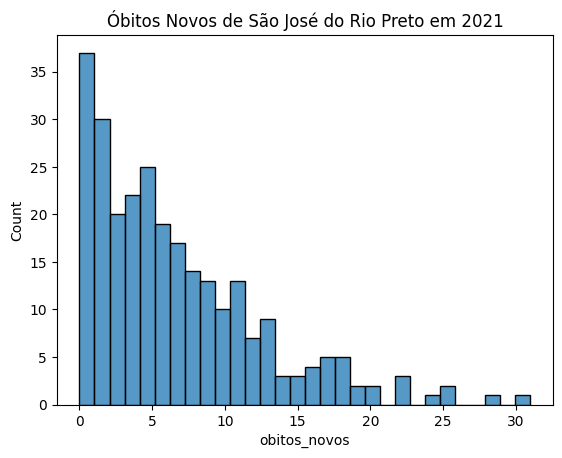

In [33]:
# Construir um histograma:

import seaborn as sns
import matplotlib.pyplot as plt

# sns.histplot(nome_tabela, x="itens_eixo_x", nbins=num_bins) --> Quanto menor o nbins, maior a faixa de valores(frequencia) 
# plt.title('titulo_grafico')
# plt.show() --> Exibe o gráfico

sns.histplot(covid_sjrp_2021, x='obitos_novos', bins=30)
plt.title('Óbitos Novos de São José do Rio Preto em 2021')
plt.show()

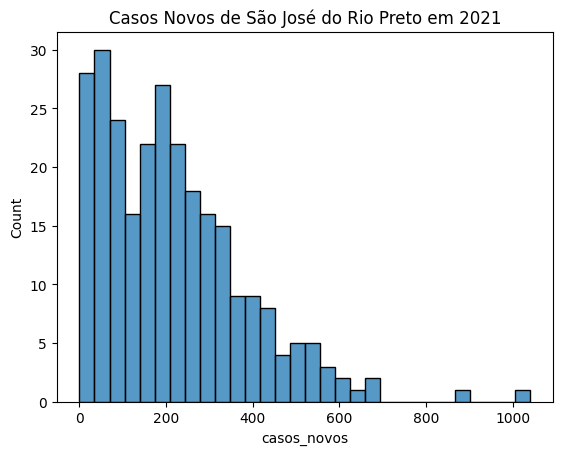

In [34]:
# Rio Preto 2021:

sns.histplot(covid_sjrp_2021, x="casos_novos", bins=30)
plt.title('Casos Novos de São José do Rio Preto em 2021')
plt.show()

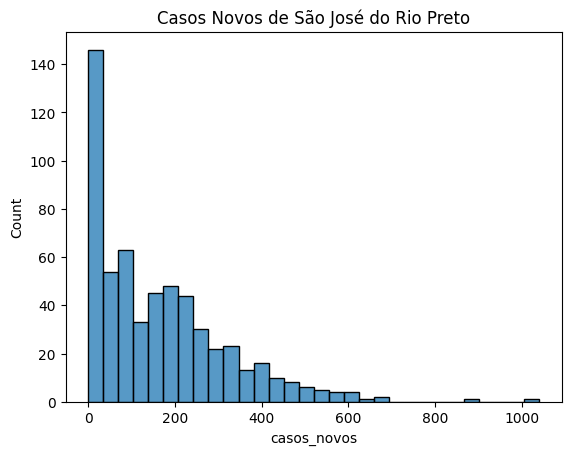

In [35]:
# Rio Preto geral:

sns.histplot(covid_sjrp, x="casos_novos", bins=30)
plt.title('Casos Novos de São José do Rio Preto')
plt.show()

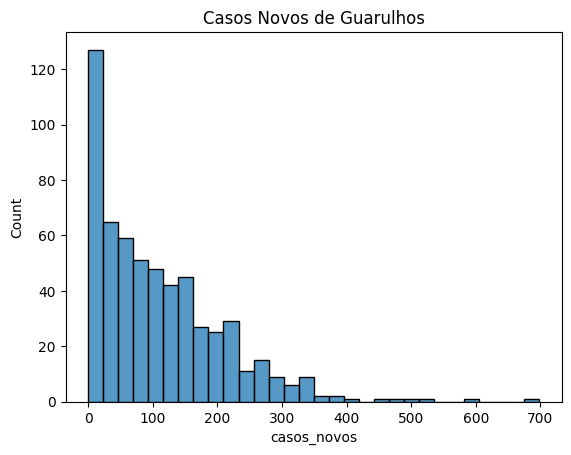

In [36]:
# Guarulhos geral:

sns.histplot(covid_guarulhos, x="casos_novos", bins=30)
plt.title('Casos Novos de Guarulhos')
plt.show()

# **Medidas de Posição**

In [37]:
# Obter valor MÍNIMO:
# nome_tabela['nome_coluna'].min()

covid_sjrp['obitos_novos'].min()

0

In [38]:
covid_sjrp.casos_novos.min()

0

In [39]:
# Obter valor MÁXIMO:
# nome_tabela['nome_coluna'].max()

covid_guarulhos['obitos_novos'].max()

77

In [40]:
covid_sjrp.obitos_novos.max()

31

In [41]:
covid_guarulhos['casos_novos'].max()

698

In [42]:
covid_sjrp['casos_novos'].max()

1040

In [43]:
# DIVIDE A QUANTIDADE DE DADOS, NÃO O VALOR:
# Primeiro Quartil:
# nome_tabela['nome_coluna'].quantile(q=0.25)

covid_sjrp['casos_novos'].quantile(q=0.25)

34.0

In [44]:
# Segundo Quartil:
# nome_tabela['nome_coluna'].quantile(q=0.50)

covid_sjrp['casos_novos'].quantile(q=0.5)

133.0

In [45]:
# Terceiro Quartil:
# nome_tabela['nome_coluna'].quantile(q=0.75)

covid_sjrp['casos_novos'].quantile(q=0.75)

243.5

In [46]:
covid_sjrp['casos_novos'].quantile(q=0.99)

618.6600000000001

In [47]:
covid_sjrp['casos_novos'].describe()

count     579.000000
mean      164.034542
std       155.344150
min         0.000000
25%        34.000000
50%       133.000000
75%       243.500000
max      1040.000000
Name: casos_novos, dtype: float64

In [48]:
covid_guarulhos['casos_novos'].describe()

count    579.000000
mean     109.495682
std      100.261861
min        0.000000
25%       27.500000
50%       87.000000
75%      161.000000
max      698.000000
Name: casos_novos, dtype: float64

In [49]:
covid_sjrp.obitos_novos.describe()  # min, 25%, 50%, 75%, max

count    579.000000
mean       4.811744
std        4.906475
min        0.000000
25%        1.000000
50%        4.000000
75%        7.000000
max       31.000000
Name: obitos_novos, dtype: float64

In [50]:
covid_guarulhos.obitos_novos.describe()

count    579.000000
mean       8.404145
std       11.511197
min        0.000000
25%        0.000000
50%        4.000000
75%       12.000000
max       77.000000
Name: obitos_novos, dtype: float64

# **Gráfico BoxPlot e Outliers**

## **São José do Rio Preto**

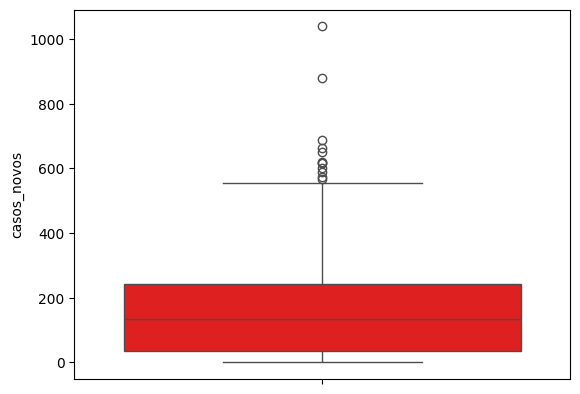

In [51]:
# Criar BoxPlot:
# sns.boxplot(data=nome_tabela, y='nome_coluna', color='cor');

sns.boxplot(data=covid_sjrp, y='casos_novos', color='r')
plt.show()

In [52]:
# Outlier Superior:
# outlier_sup = quartil_3 + 1.5 * interquartil --> interquartil = quartil_3 - quartil_1
# ou seja, 
# outlier_sup = nome_tabela.nome_coluna.quantile(q=0.75) + 1.5 * (nome_tabela.nome_coluna.quantile(q=0.75) - nome_tabela.nome_coluna.quantile(q=0.25))

outlier_sup = covid_sjrp.casos_novos.quantile(q=0.75) + 1.5 * (covid_sjrp.casos_novos.quantile(q=0.75) - 
                                                               covid_sjrp.casos_novos.quantile(q=0.25))
outlier_sup

557.75

In [53]:
# Outlier Inferior:
# outlier_inf = quartil_1 - 1.5 * interquartil
# ou seja, 
# outlier_inf = nome_tabela.nome_coluna.quantile(q=0.25) + 1.5 * (nome_tabela.nome_coluna.quantile(q=0.75) - nome_tabela.nome_coluna.quantile(q=0.25))

outlier_inf = covid_sjrp.casos_novos.quantile(q=0.25) - 1.5 * (covid_sjrp.casos_novos.quantile(q=0.75) - 
                                                               covid_sjrp.casos_novos.quantile(q=0.25))
outlier_inf

-280.25

In [54]:
# Excluir Outliers (CASO SEJA NECESSÁRIO!!!):
# nome_tabela = nome_tabela.loc[nome_tabela.nome_coluna <= outlier_sup]
# nome_tabela = nome_tabela.loc[nome_tabela.nome_coluna >= outlier_inf]

sem_outliers = covid_sjrp.loc[covid_sjrp.casos_novos <= outlier_sup]

In [55]:
sem_outliers.head()

,indice,municipio,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
556,557,São José do Rio Preto,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,447924,79391,431.94,9,1037.00514,17.724212
1201,1202,São José do Rio Preto,26,2,2020-02-26,0,0,0.0,0.0,0,0,0.0,0.0,0.0,447924,79391,431.94,9,1037.00514,17.724212
1846,1847,São José do Rio Preto,27,2,2020-02-27,0,0,0.0,0.0,0,0,0.0,0.0,0.0,447924,79391,431.94,9,1037.00514,17.724212
2491,2492,São José do Rio Preto,28,2,2020-02-28,0,0,0.0,0.0,0,0,0.0,0.0,0.0,447924,79391,431.94,9,1037.00514,17.724212
3136,3137,São José do Rio Preto,29,2,2020-02-29,0,0,0.0,0.0,0,0,0.0,0.0,0.0,447924,79391,431.94,9,1037.00514,17.724212


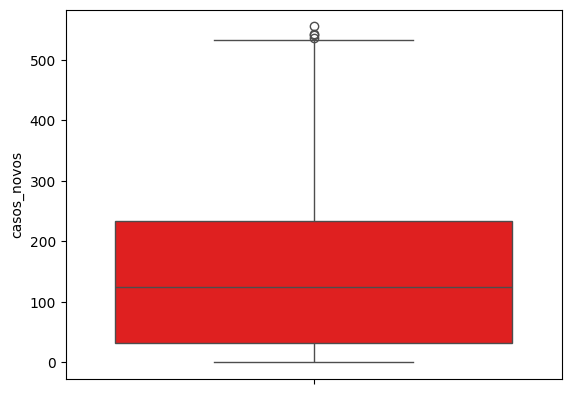

In [56]:
sns.boxplot(sem_outliers, y='casos_novos', color='r');

## **Guarulhos**

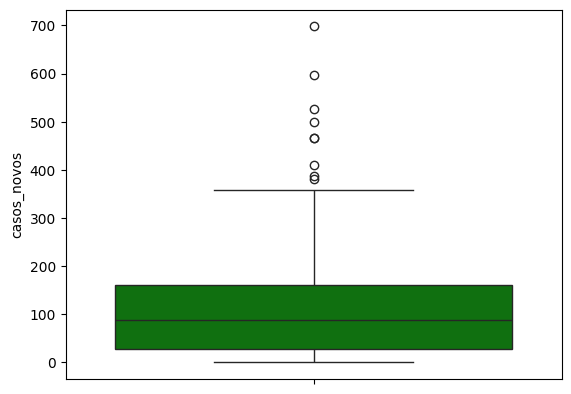

In [57]:
sns.boxplot(covid_guarulhos, y='casos_novos', color='g');

In [58]:
outlier_sup_2 = covid_guarulhos.casos_novos.quantile(q=0.75) + 1.5 * (covid_guarulhos.casos_novos.quantile(q=0.75) - 
                                                                      covid_guarulhos.casos_novos.quantile(q=0.25))
outlier_sup_2

361.25

In [59]:
outlier_inf_2 = covid_guarulhos.casos_novos.quantile(q=0.25) - 1.5 * (covid_guarulhos.casos_novos.quantile(q=0.75) - 
                                                                      covid_guarulhos.casos_novos.quantile(q=0.25))
outlier_inf_2

-172.75

In [60]:
sem_outliers_2 = covid_guarulhos.loc[covid_guarulhos.casos_novos <= outlier_sup_2]

In [61]:
sem_outliers_2.head()

,indice,municipio,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
212,213,Guarulhos,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304,12.037668
857,858,Guarulhos,26,2,2020-02-26,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304,12.037668
1502,1503,Guarulhos,27,2,2020-02-27,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304,12.037668
2147,2148,Guarulhos,28,2,2020-02-28,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304,12.037668
2792,2793,Guarulhos,29,2,2020-02-29,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304,12.037668


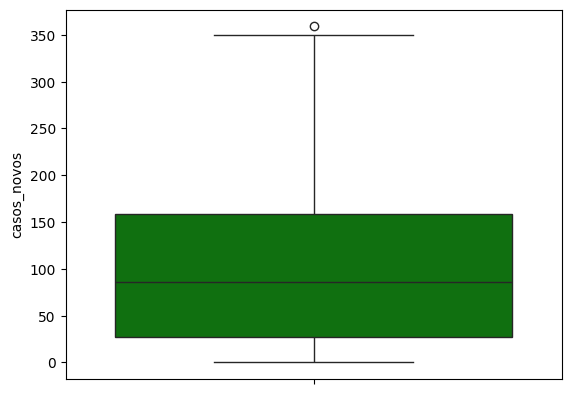

In [62]:
sns.boxplot(sem_outliers_2, y='casos_novos', color='g');

# **Medidas de Dispersão**

In [63]:
# Variância:
# nome_tabela['nome_coluna'].var()

In [64]:
# Variância óbitos novos:

covid_sjrp['obitos_novos'].var()

24.073495048735744

In [65]:
covid_guarulhos['obitos_novos'].var()

132.50766444950426

In [66]:
# Variância casos novos:

covid_sjrp.casos_novos.var()

24131.805033137913

In [67]:
covid_guarulhos.casos_novos.var()

10052.440725269078

In [68]:
# Desvio padrão:
# nome_tabela['nome_coluna'].std()

In [69]:
# Desvio padrão óbitos novos:

covid_sjrp.obitos_novos.std()

4.90647480873343

In [70]:
covid_guarulhos.obitos_novos.std()

11.511197350819083

In [71]:
# Desvio padrão casos novos:

covid_sjrp.casos_novos.std()

155.34415030228178

In [72]:
covid_guarulhos.casos_novos.std()

100.26186077102837

In [73]:
covid_sjrp.casos_novos.describe()  # std

count     579.000000
mean      164.034542
std       155.344150
min         0.000000
25%        34.000000
50%       133.000000
75%       243.500000
max      1040.000000
Name: casos_novos, dtype: float64

In [74]:
covid_guarulhos.casos_novos.describe()

count    579.000000
mean     109.495682
std      100.261861
min        0.000000
25%       27.500000
50%       87.000000
75%      161.000000
max      698.000000
Name: casos_novos, dtype: float64

# **Testes de Normalidade**

Existem testes de normalidade numéricos e testes gráficos:

Histograma

QQplot

Shapiro-Wilk (limite de 5000 amostras)

Kolmogorov_Smirnov

## **Histograma**

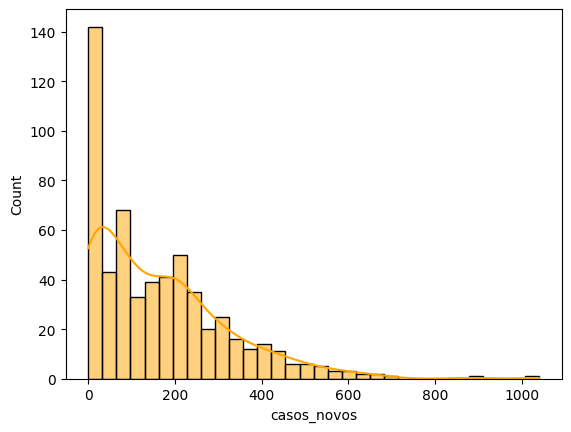

In [75]:
# sns.histplot(nome_tabela, x='nome_coluna', bins=num_bins, color="cor_grafico", kde=False_True, stat="eixo_y");

sns.histplot(covid_sjrp, x='casos_novos', bins=32, color="orange", kde=True, stat="count",);

## **QQPLOT**

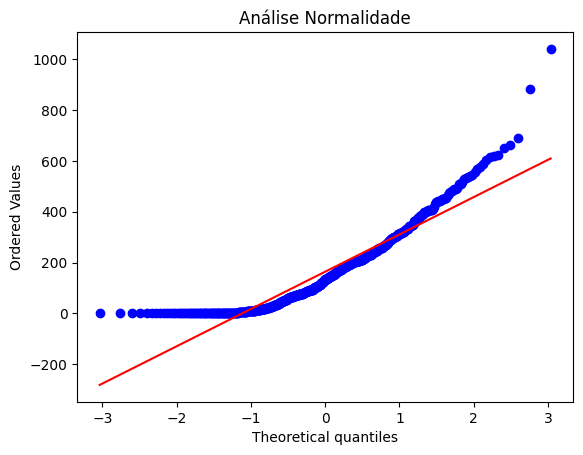

In [76]:
import scipy.stats as stats

# stats.probplot(nome_tabela['nome_coluna'], dist="tipo_distribuição", plot=plt)
# plt.title("titulo_grafico")

stats.probplot(covid_sjrp['casos_novos'], dist="norm", plot=plt)
plt.title("Análise Normalidade")
plt.show()

# Eixo x --> Quantis de distribuições teóricas
# Eixo y --> Quantis de distribuições empíricas
# Quanto mais próximos (pontos azuis) da linha vermelha, mais normalidade

## **Teste de Shapiro-Wilk**

CRITÉRIOS:

- Nível de significância de 0,05 ou 5% (mais utlizado)

- Ho = Distribuição Normal --> p >= 0,05

- Ha = Distribuição Não Normal --> p < 0,05

In [77]:
# stats.shapiro(nome_tabela.nome_coluna)

stats.shapiro(covid_sjrp.casos_novos,)

# Retorna estatística de teste (W) e p-valor

ShapiroResult(statistic=0.8849250078201294, pvalue=2.4392858330546945e-20)

In [78]:
estatistica, p = stats.shapiro(covid_sjrp.casos_novos)
print(f'Estatística de teste (W) = {round(estatistica, 2)}')
print(f'p_valor = {p}')

Estatística de teste (W) = 0.88
p_valor = 2.4392858330546945e-20


## **Teste Lillefors (Kolmogorov-Smirnov)**

In [79]:
from statsmodels.stats.diagnostic import lilliefors

# estatistica_teste, p_valor = lilliefors(nome_tabela.nome_tabela, dist='tipo_distribuição')

estatistica, p = lilliefors(covid_sjrp.casos_novos, dist='norm')
print(f'Estatística de teste (D) = {round(estatistica, 2)}')
print(f'p_valor = {p}')

Estatística de teste (D) = 0.15
p_valor = 0.0009999999999998899


# **Correlação Linear**

## **Gráfico Dispersão**

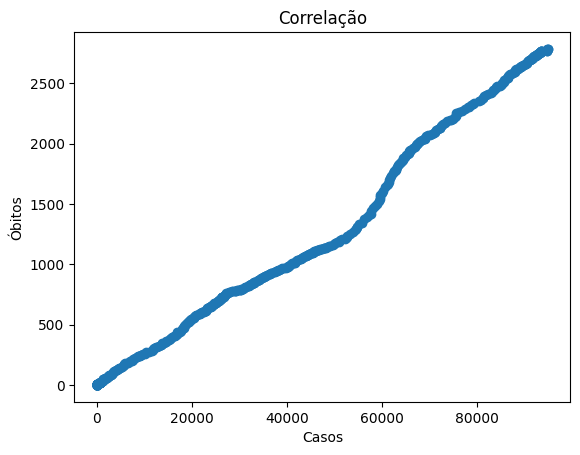

In [80]:
# plt.scatter(nome_tabela.nome_coluna_x, nome_tabela.nome_coluna_y)
# plt.title('titulo_grafico')
# plt.xlabel('nome_eixo_x')
# plt.ylabel('nome_eixo_y')
# plt.grid(True_False)

plt.scatter(covid_sjrp.casos, covid_sjrp.obitos)
plt.title('Correlação')
plt.xlabel('Casos')
plt.ylabel('Óbitos')
plt.grid(False)

plt.show()

In [81]:
# Cria um DataFrame apenas com as varáveis desejadas para a análise:

df = covid_sjrp[['casos', 'casos_novos', 'obitos', 'obitos_novos']]
df

,casos,casos_novos,obitos,obitos_novos
556,0,0,0,0
1201,0,0,0,0
1846,0,0,0,0
2491,0,0,0,0
3136,0,0,0,0
...,...,...,...,...
370786,94775,16,2778,5
371431,94813,38,2781,3
372076,94864,51,2782,1
372721,94908,44,2783,1


### **Determinação da correlação:**

method:

- "pearson" para dados paramétricos (normalidade e homocedasticidade)

- "spearman" (volume "grande" de dados não paramétricos: maior ou igual a 30)

- "kendall" (volume "pequeno" de dados não paramétricos: menor que 30)

### **Normalidade**

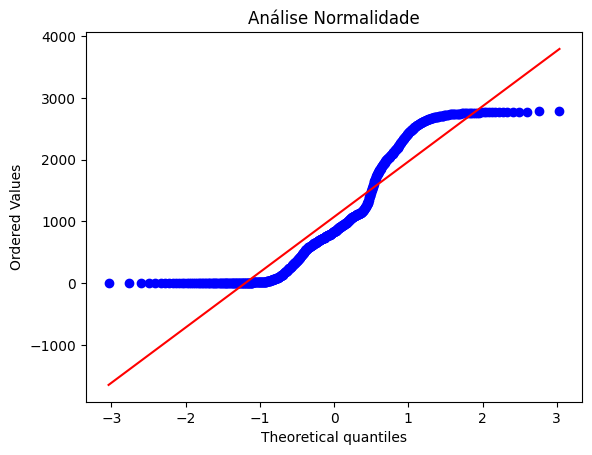

In [82]:
stats.probplot(covid_sjrp['obitos'], dist="norm", plot=plt)
plt.title("Análise Normalidade")
plt.show()

In [83]:
estatistica, p = stats.shapiro(covid_sjrp.obitos)

print(p)

9.772331143747076e-21


### **Correlação Linear**

In [84]:
# nome_correlacao = df.corr(method='nome_metodo')

correlacoes = df.corr(method='spearman')
correlacoes

,casos,casos_novos,obitos,obitos_novos
casos,1.000000,0.419272,0.999829,0.458497
casos_novos,0.419272,1.000000,0.418955,0.675925
obitos,0.999829,0.418955,1.000000,0.458785
obitos_novos,0.458497,0.675925,0.458785,1.000000


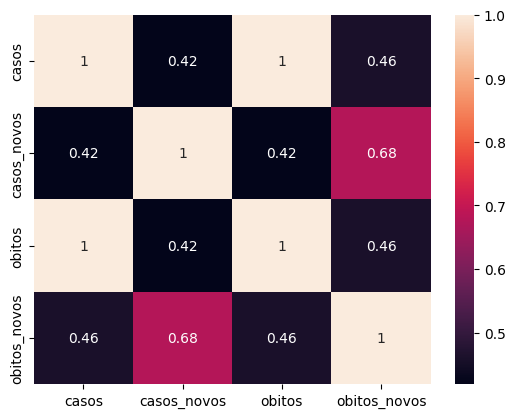

In [85]:
# Mapa de calor:

# plt.figure()
# sns.heatmap(nome_correlacao, annot=True_False);  --> annot: Anotar valores no mapa

plt.figure()
sns.heatmap(correlacoes, annot=True);

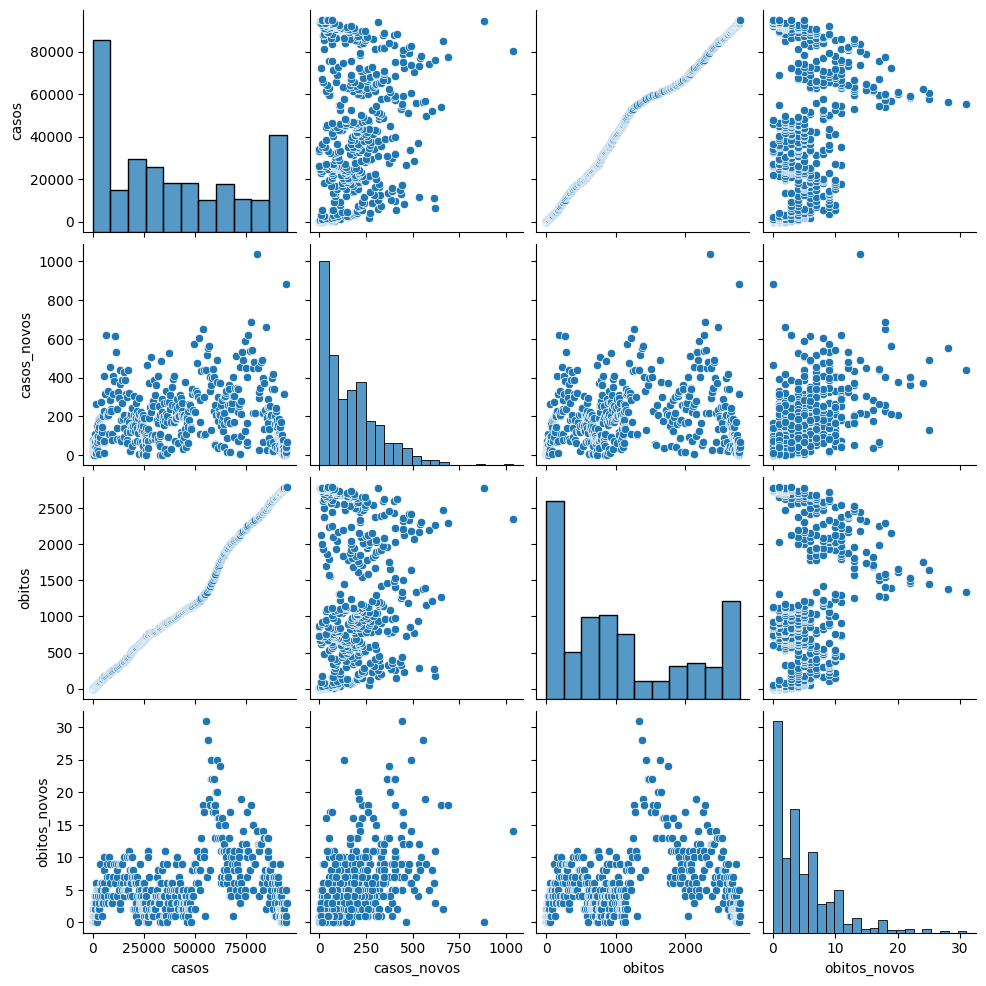

In [86]:
# Criar gráficos de dispersões:
# sns.pairplot(nome_tabela);

sns.pairplot(df);

# **Introdução à Regressão Linear Simples com Statsmodels**

In [87]:
# Chamar regressão linear simples:

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# nome_regressao = smf.ols('variavel_dependente(y) ~ variavel_independente(x)', data=nome_tabela).fit()

regressao = smf.ols('obitos ~ casos', data=covid_sjrp).fit()
print(regressao.summary())  # Imprime um sumário

                            OLS Regression Results                            
Dep. Variable:                 obitos   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.280e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:47:39   Log-Likelihood:                -3431.0
No. Observations:                 579   AIC:                             6866.
Df Residuals:                     577   BIC:                             6875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.2671      5.873     -9.240      0.0

In [88]:
# Coeficientes:

# nome_tabela_coef = pd.DataFrame(nome_regressao.params)
# nome_tabela_coef.columns = ['nome_coluna']

coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

           Coeficientes
Intercept    -54.267056
casos          0.029288


## **Equação:**

y = mx + b

obitos = 0.029 * casos - 54.26 

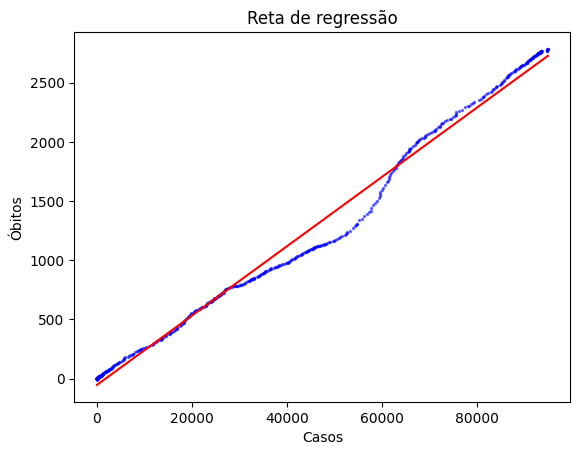

In [89]:
# Gráfico de dispersão:
plt.scatter(y=covid_sjrp.obitos, x=covid_sjrp.casos, color='blue', s=2, alpha=0.5)  # Quanto maior o s, maior a bolinha

# Limitações para o gráfico:
x_plot = np.linspace(min(covid_sjrp.casos), max(covid_sjrp.casos), len(covid_sjrp.obitos))

# Equação:
plt.plot(x_plot, x_plot * regressao.params.iloc[1] + regressao.params.iloc[0], color='r')

plt.title('Reta de regressão')
plt.ylabel('Óbitos')
plt.xlabel('Casos')
plt.show()